# Using XGBoost in Python
## based on [link](https://www.datacamp.com/community/tutorials/xgboost-in-python)

One of the most popular machine learning algorithm these days. Can do regression or classification.

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [11]:
# data 
# 506 rows with 13 columns
print(boston.data.shape)

# target vector 506 x 1
print(boston.target.shape)

(506, 13)
(506,)


In [7]:
# feature names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [12]:
# there also a description presented
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [14]:
# now convert to pandas
import pandas as pd

data = pd.DataFrame(boston.data)

# label the columns
data.columns = boston.feature_names

In [15]:
# top 5
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
# there no column called PRICE. This is target.
data['PRICE'] = boston.target

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [17]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


XGBoost is capable of handling missing values internally!

In [42]:
# pip install xgboost
# xgboost
# We will build the model using Trees (default learners) and RMSE as the performance metrics

import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [20]:
# Separate target and features
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [23]:
# Push the data to DMatrix. This gains the performance.
data_dmatrix = xgb.DMatrix(data=X,label=y)
type(data_dmatrix)

xgboost.core.DMatrix

## Haperparameters

- `objective`: determines the loss function to be used like `reg:linear` for regression problems, `reg:logistic` for classification problems with only decision, `binary:logistic` for classification problems with probability.

You may consider applying techniques like `Grid Search`, `Random Search` and `Bayesian Optimization` to reach the optimal set of hyper-parameters.

In [26]:
# 80% train, 20% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [27]:
# XGBRegressor. For classifiaction please use XGBClassifier
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)


In [28]:
# fit
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [31]:
# predict
preds = xg_reg.predict(X_test)
print(preds)

[ 8.7865    16.518028  23.26055   10.160174  19.505001  17.309511
 20.188196   7.4900937 13.422026  21.048647  18.30573   15.503931
 12.003749  14.321918  13.288744  13.346214  13.346214  24.62459
 13.173243  11.017137  10.480247   8.564388  19.393785  21.68093
 18.842314  14.403052  10.06353   14.923799  15.589301  12.22327
 14.304101  16.711956   7.329916  14.314029  15.145936  22.482647
 15.242693  10.212233  13.204566  22.410995  17.197445  13.393843
  9.194263  19.762125  14.465041  17.424555  13.448325  13.96071
 13.275354   9.199998  16.711956  19.37052   13.0075245  7.8414702
 14.012573  11.063658  13.82528    7.8533106 21.896305   7.382577
 11.729148  13.59726   11.6728325 11.972701  13.766816  15.422793
 15.74015   12.293853  14.541842  18.934757  13.851449  14.866195
 13.553424  15.826132  11.063658  10.807808   9.318833  14.686813
 14.758094   7.298537  20.007277   9.166715  14.620236  14.368872
 14.472399  15.3996105 10.346463  17.67519   14.121242  17.76694
  8.953765  19

In [32]:
# rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))

# now RMSE 10.9
print("RMSE: %f" % (rmse))

RMSE: 10.868649


## k-fold Cross Validation
It is common to do a cross validation where all the entries in the training dataset are used for both training as well as validation.

In [38]:
# cv() method

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[14:00:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[14:00:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[14:00:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:00:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:00:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[14:00:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:00:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[14:00:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[14:00:40] /workspace/

In [39]:
# head
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.749371,0.033853,21.746693,0.019311
1,19.859423,0.029633,19.891096,0.053295
2,18.072169,0.018803,18.168509,0.014465
3,16.570206,0.018556,16.687861,0.037342
4,15.206344,0.015451,15.365013,0.059400


In [40]:
# tail, now its 4.03
print((cv_results["test-rmse-mean"]).tail(1))

49    4.031162
Name: test-rmse-mean, dtype: float64


## Visualize Boosting Trees and Feature Importance

[14:26:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:26:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[14:26:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:26:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[14:26:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[14:26:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[14:26:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[14:26:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[14:26:56] /worksp

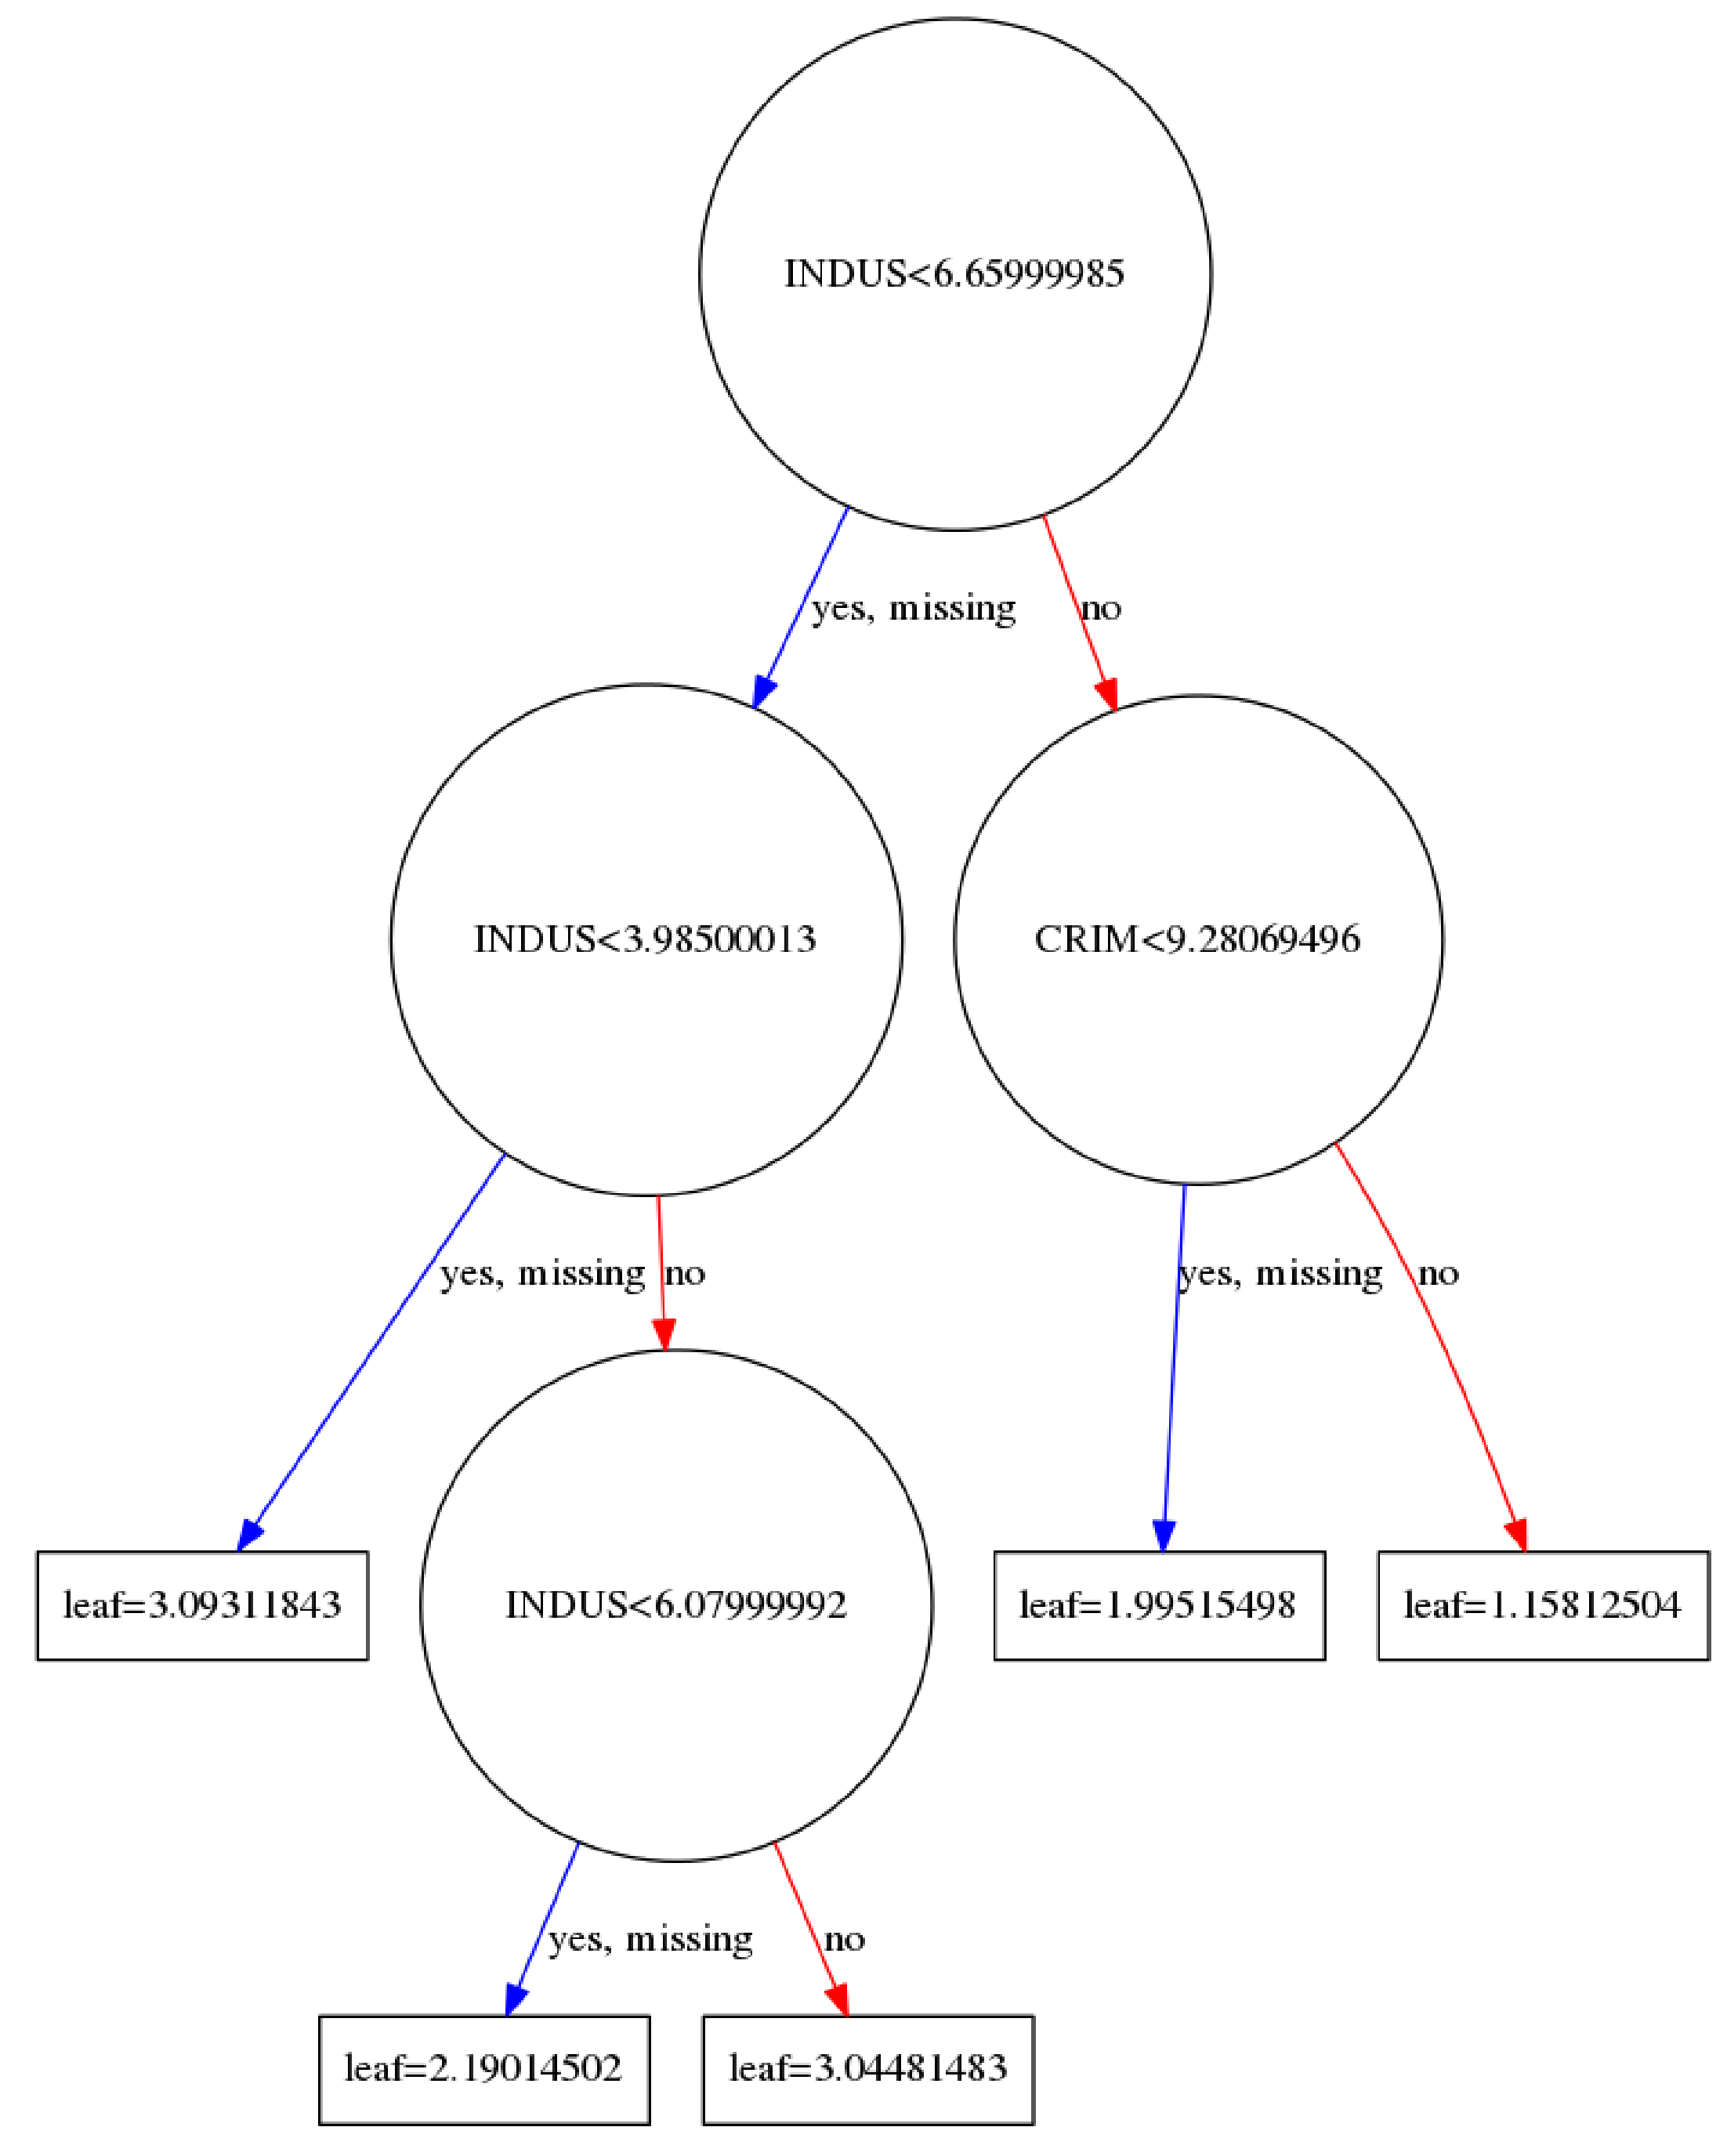

In [47]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

# pip install graphviz
# sudo apt-get install graphviz
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [200, 100]
plt.show()

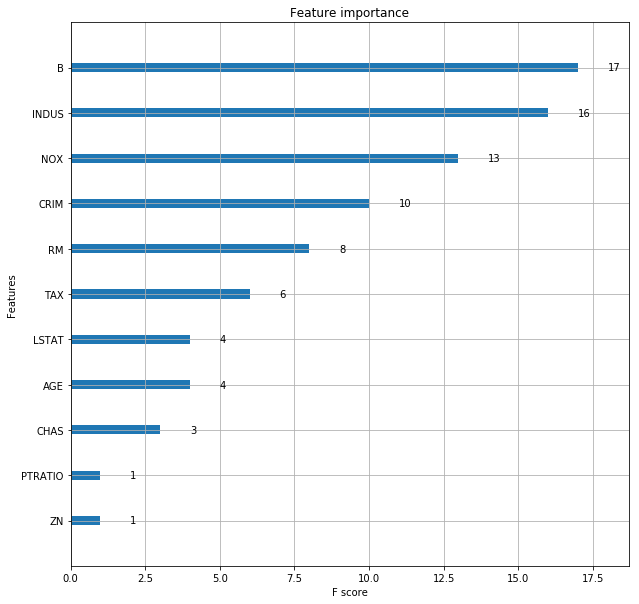

In [50]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()